In [10]:
import numpy as np
import random
import math
import csv
import operator
from collections import defaultdict


class KNN:
    #Reading data,making train/test arrays 
    def __init__(self, file, split=0.8):
        self.split = split
        self.file = file
        self.test = []
        self.train = []

        with open(self.file, 'r') as csvfile:
            lines = [line.split() for line in csvfile]
            # lines = csv.reader(csvfile)
            matrices = list(lines)

            for ind in range(len(matrices) - 1):
                for y in range(7):
                    matrices[ind][y] = float(matrices[ind][y])
                if random.random() < split:
                    self.train.append(matrices[ind])
                else:
                    self.test.append(matrices[ind])
    
    #Finding eucledian Distance
    def ecd(self, first, second, size):
        distance = 0
        for ind in range(1, size):
            distance += pow((first[ind] - second[ind]), 2)

        d = math.sqrt(distance)
        return d

    #Find closest points
    def find_neighbours(self, train, test, k):
        all_dist = []
        size = len(test) - 1
        for ind in range(len(train)):
            dist = self.ecd(test, train[ind], size)
            all_dist.append((train[ind], dist))

        all_dist.sort(key=operator.itemgetter(1))
        neigh = []
        for ind in range(k):
            neigh.append(all_dist[ind][0])
        return neigh
    
    def check_resp(self, neighbors):
        check_class_val = {}
        for ind in range(len(neighbors)):
            response = neighbors[ind][-1]
            if response in check_class_val:
                check_class_val[response] += 1
            else:
                check_class_val[response] = 1
        sorted_val = sorted(check_class_val.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_val[0][0]

    def predict(self, k):
        predicts = []
        for ind in range(len(self.test)):
            neighbors = self.find_neighbours(self.train, self.test[ind], k)
            result = self.check_resp(neighbors)
            predicts.append(result)
            # print("Predicted: ", result, end=", ")
            # print("Actual: ", self.test[ind][-1])

        return predicts


def helper_func(num, types):
    if num == 1:
        return defaultdict(types)
    else:
        return defaultdict(lambda: helper_func(num - 1, types))


def find_confusion_mat(predict, test, size, arr):
    matrix = helper_func(2, float)

    for row in arr:
        for col in arr:
            matrix[row][col] = 0
    for row in arr:
        for k in range(len(test)):
            for col in arr:
                if test[k][-1] == row and predict[k] == col:
                    matrix[row][col] += 1

    array = np.arange(size * size).reshape(size, size)
    ind1 = 0
    for row in arr:
        ind2 = 0
        for col in arr:
            array[ind1][ind2] = matrix[row][col]
            ind2 += 1
        ind1 += 1

    return array


def find_accuracy(test, predicts):
    sum_accuracy = 0
    for ind in range(len(test)):
        if test[ind][-1] == predicts[ind]:
            sum_accuracy += 1

    ans = (sum_accuracy / float(len(test))) * 100.0
    return ans


def find_precision(confuse):
    rows, cols = confuse.shape
    precision_sum = 0
    for i in range(rows):
        TP_FP = confuse[:, i]
        TP = confuse[i, i]
        precision_sum += TP / TP_FP.sum()

    return precision_sum / rows


def find_recall(confuse):
    rows, cols = confuse.shape
    recall_sum = 0
    for j in range(cols):
        TP_FN = confuse[j, :]
        TP = confuse[j, j]
        recall_sum += TP / TP_FN.sum()

    return recall_sum / cols


def find_F1(confuse):
    precision = find_precision(confuse)
    recall = find_recall(confuse)
    ans = 2 * (precision * recall) / (precision + recall)

    return ans

def knn_algo():
    
    knn = KNN('wifi_localization.txt', 0.7)
    print('Train set: ', len(knn.train))
    print('Test set: ', len(knn.test))
    
    k = 3
    for i in range(4):
        predicts = knn.predict(k)

        temp = np.array(predicts)
        arr = np.unique(temp)
        
        if k == 3:
            confuse = find_confusion_mat(predicts, knn.test, len(arr), arr)
            print("Confusion Matrix: ")
            print(confuse)
            print("Precision: ", find_precision(confuse))
            print("Recall: ", find_recall(confuse))
            print("F1 Score: ", find_F1(confuse))
        
        print("For k = ", k)
        print("Accuracy%: ", find_accuracy(knn.test, predicts))
        k += 2


def main():
    knn_algo()


main()


Train set:  1406
Test set:  593
Confusion Matrix: 
[[156   0   0   0]
 [  0 146   8   0]
 [  4   2 134   1]
 [  1   0   2 139]]
Precision:  0.9697108210695167
Recall:  0.9693199493544116
F1 Score:  0.9695153458158132
For k =  3
Accuracy%:  96.964586846543
For k =  5
Accuracy%:  97.13322091062395
For k =  7
Accuracy%:  96.964586846543
For k =  9
Accuracy%:  97.3018549747049


For k =  3
Centroids: 
 [[0.07322176 0.4175523  0.31834031 0.10536611 0.4022113  0.17788773
  0.08591179 0.11999233]
 [2.         0.57909334 0.45473221 0.15801071 1.04653213 0.44618783
  0.2306886  0.30200995]
 [0.99094708 0.58013231 0.45465529 0.15678621 1.05645369 0.46157347
  0.22954875 0.30000035]]
-------------------------
Davies Bouldin Index 0.7652389303029267
-------------------------
For k =  5
Centroids: 
 [[2.         0.5777101  0.45356592 0.15756361 1.03599113 0.44118427
  0.2287128  0.29944487]
 [0.         0.5291215  0.4084486  0.13641121 0.70562336 0.31301121
  0.15055421 0.20771028]
 [1.00831025 0.6426662  0.50581025 0.17646814 1.40332895 0.62270914
  0.30363643 0.38802839]
 [0.         0.35897883 0.27087173 0.08861146 0.24187422 0.10742528
  0.05153674 0.07333001]
 [1.         0.49278049 0.38319512 0.13031098 0.65004695 0.27505183
  0.14212561 0.19396463]]
-------------------------
Davies Bouldin Index 0.663895162289479
-------------------------
For k =  7
Centroids: 


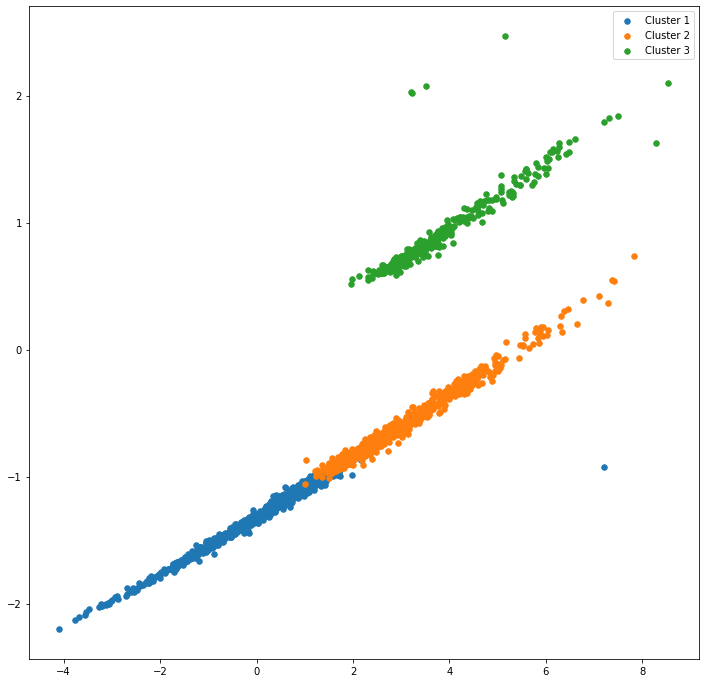

In [7]:
import numpy as np
from numpy import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import csv


class K_Means:
    #Reading data
    def __init__(self, file):
        self.file = file
        with open(self.file, 'r') as csvfile:
            data = csv.reader(csvfile)
            matrices = list(data)

        for i in range(len(matrices)):
            if matrices[i][0] == 'M':
                matrices[i][0] = 1
            elif matrices[i][0] == 'F':
                matrices[i][0] = 2
            elif matrices[i][0] == 'I':
                matrices[i][0] = 0

        for i in range(len(matrices)):
            for j in range(9):
                matrices[i][j] = float(matrices[i][j])

        self.data = np.array(matrices)
        self.data = np.delete(self.data, np.s_[-1:], 1)


def find_closest_centroids(data, centroids):
    m = data.shape[0]  # no of data points
    k = centroids.shape[0]  # size size
    idx = np.zeros(m)  # array to assign the centriod

    # Your Code Here
    for i in range(m):
        min_dist = math.inf
        for j in range(k):
            dist = np.sqrt(np.sum((data[i, :] - centroids[j, :]) ** 2))
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx


# Update Centroids
def compute_centroids(data, idx, k):
    m, n = data.shape
    centroids = np.zeros((k, n))  # 3*4

    for i in range(k):
        same_idx = (idx == i)
        centroids[i] = np.mean(data[same_idx], axis=0)

    return centroids


def k_means_algo(data, initial_centroids, it_num):
    m, n = data.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    centroid_temp = None

    for i in range(it_num):
        idx = find_closest_centroids(data, centroids)
        centroids = compute_centroids(data, idx, k)
        if (centroid_temp == centroids).all():
            break

        centroid_temp = centroids

    return idx, centroids


def ecd(first, second):
    distance = 0
    for ind in range(len(first)):
        distance += pow((first[ind] - second[ind]), 2)

    d = math.sqrt(distance)
    return d


def davies_bouldin(X, idx):
    x, length = np.unique(idx, return_inverse=True)
    krange = len(np.bincount(length))
    check_cluster = [X[idx == k] for k in range(krange)]
    centroids = [np.mean(k, axis=0) for k in check_cluster]

    dispersion = [np.mean([ecd(j, centroids[i]) for j in k]) for i, k in enumerate(check_cluster)]
    arr = []

    for i in range(krange):
        temp_arr = []
        for j in range(krange):
            if j != i:
                r = (dispersion[i] + dispersion[j]) / ecd(centroids[i], centroids[j])
                temp_arr.append(r)
        arr.append(max(temp_arr))

    ans = np.mean(arr)

    return ans


def graph(data, k, idx):
    fig, ax = plt.subplots(figsize=(12, 12))
    temp_data = np.copy(data)
    for i in range(k):
        x = StandardScaler().fit_transform(temp_data)
        pca = PCA(n_components=2)
        p_component = pca.fit_transform(x)
        k_mean_cluster = p_component[np.where(idx == i)[0], :]
        ax.scatter(k_mean_cluster[:, 0], k_mean_cluster[:, 1], s=30, label=('Cluster ' + str(i + 1)))

    ax.legend()


def main():
    k_mean = K_Means('abalone.data')

    k = 3
    for i in range(3):
        print("For k = ", k)
        
        initial_centroids = np.zeros((k, k_mean.data.shape[1]))
        size = k_mean.data.shape[0] // k
        for i in range(k):
            initial_centroids[i, :] = k_mean.data[random.randint(size * i, size * (i + 1))]

        idx, centroids = k_means_algo(k_mean.data, initial_centroids, 100)
        print("Centroids: \n", centroids)

        val = davies_bouldin(k_mean.data, idx)
        print("-------------------------")
        print("Davies Bouldin Index", val)
        print("-------------------------")
        k += 2
        
    k = 3
    graph(k_mean.data, k, idx)


main()
